In [10]:
from hossam import load_data
from scipy.stats import t, ttest_1samp, normaltest, bartlett, levene, ttest_ind
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from math import sqrt
from pandas import melt, DataFrame
from statannotations.Annotator import Annotator

In [2]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

In [3]:
origin=load_data('styptic')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab10_/styptic.xlsx
[desc] 실험 참가자를 두 그룹으로 임의 분할한 후 피부에 작은 상처를 내어 피가 흐르게 한 다음, 한 그룹에는 지혈제 B를 다른 그룹에는 지혈제 G를 투여하여 완전히 지혈될 때 까지의 시간(분)을 측정한 두 종료의 지혈제 효과를 측정한 자료 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (10, 2)
행 개수 : 10개
열 개수 : 2개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   B       10 non-null     float64
 1   G       10 non-null     float64
dtypes: float64(2)
memory usage: 292.0 bytes
None


,B,G
0,8.8,9.9
1,8.9,10.0
2,8.4,9.0
3,7.9,11.1
4,8.2,9.8


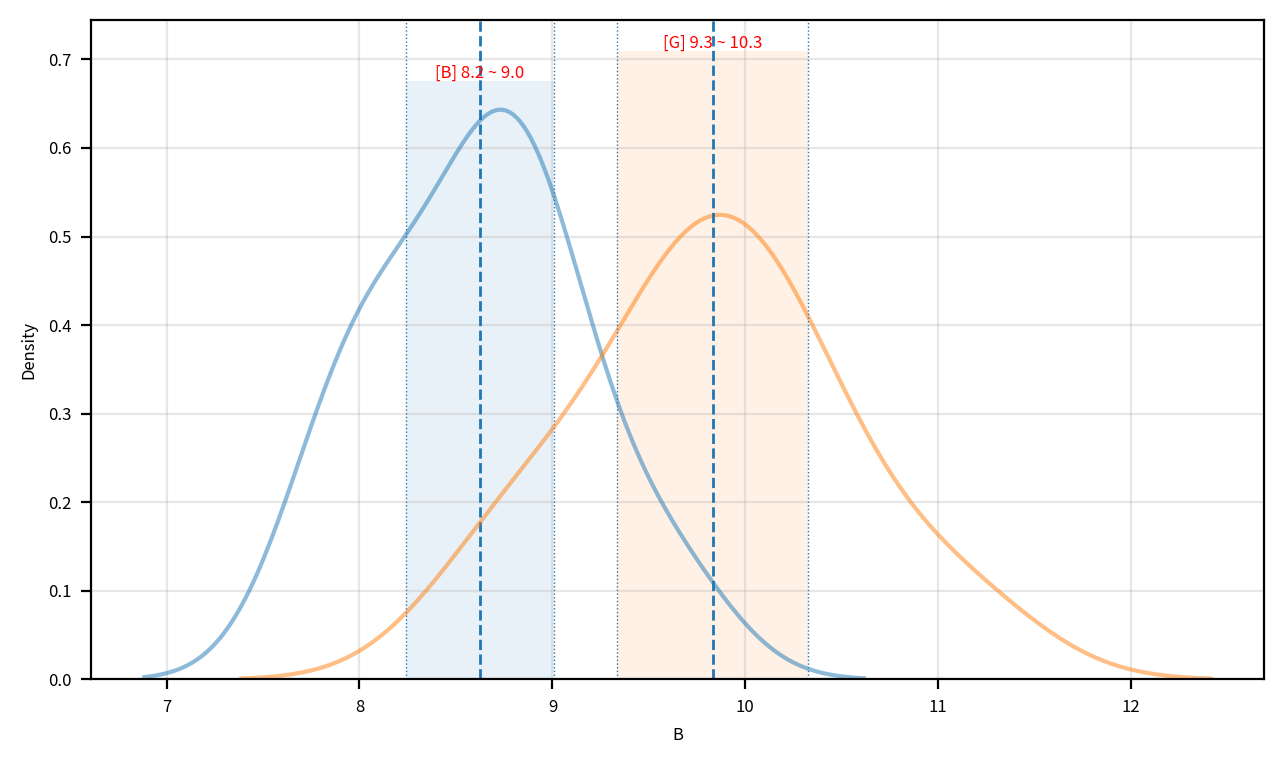

In [4]:
# 확인할 데이터
data=origin[['B','G']]

width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max=data[c].max()
    clevel=0.95
    dof=len(data[c])-1
    sp_mean=data[c].mean()
    sp_std=data[c].std(ddof=1)
    sp_std_error=sp_std/sqrt(len(data[c]))
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax=ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s='[%s] %0.1f ~ %0.1f'%(c, cmin, cmax),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontdict={'size':6, 'color':'red'})

ax.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

In [5]:
data=origin[['B', 'G']]

equal_var_fields=[]
normal_dist=True
report=[]

for c in data.columns:
    s, p=normaltest(data[c])

    normalize=(p>0.05)
    report.append({
        'field':c,
        'statistic':s,
        'p-value':p,
        'result':normalize
    })
    normal_dist=normal_dist and normalize

if len(data.columns)>1:
    if normal_dist:
        n='Bartlett'
        s, p=bartlett(*data.values.T)
    else:
        n='Levene'
        s, p=levene(*data.values.T, center='median')

    report.append({
        'field':n,
        'statistic':s,
        'p-value':p,
        'result':p>0.05
    })

report_df=DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
B,0.083269,0.959221,True
G,0.200950,0.904408,True
Bartlett,0.555515,0.456073,True


In [6]:
s, p=ttest_ind(origin['B'], origin['G'])
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s,p,'대립' if p<=0.05 else '귀무')

'statistic: -4.350, p-value: 0.000, 대립가설 채택'

In [7]:
s, p=ttest_ind(origin['B'], origin['G'], alternative='greater')
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s,p,'대립' if p<=0.05 else '귀무')

'statistic: -4.350, p-value: 1.000, 귀무가설 채택'

In [8]:
s, p=ttest_ind(origin['B'], origin['G'], alternative='less')
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s,p,'대립' if p<=0.05 else '귀무')

'statistic: -4.350, p-value: 0.000, 대립가설 채택'

In [9]:
df=melt(origin, var_name='group', value_name='value')
df

,group,value
0,B,8.80
1,B,8.90
2,B,8.40
3,B,7.90
4,B,8.20
5,B,8.70
6,B,7.90
7,B,9.10
8,B,9.60
9,B,8.75


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B vs. G: t-test independent samples, P_val:3.862e-04 t=-4.350e+00


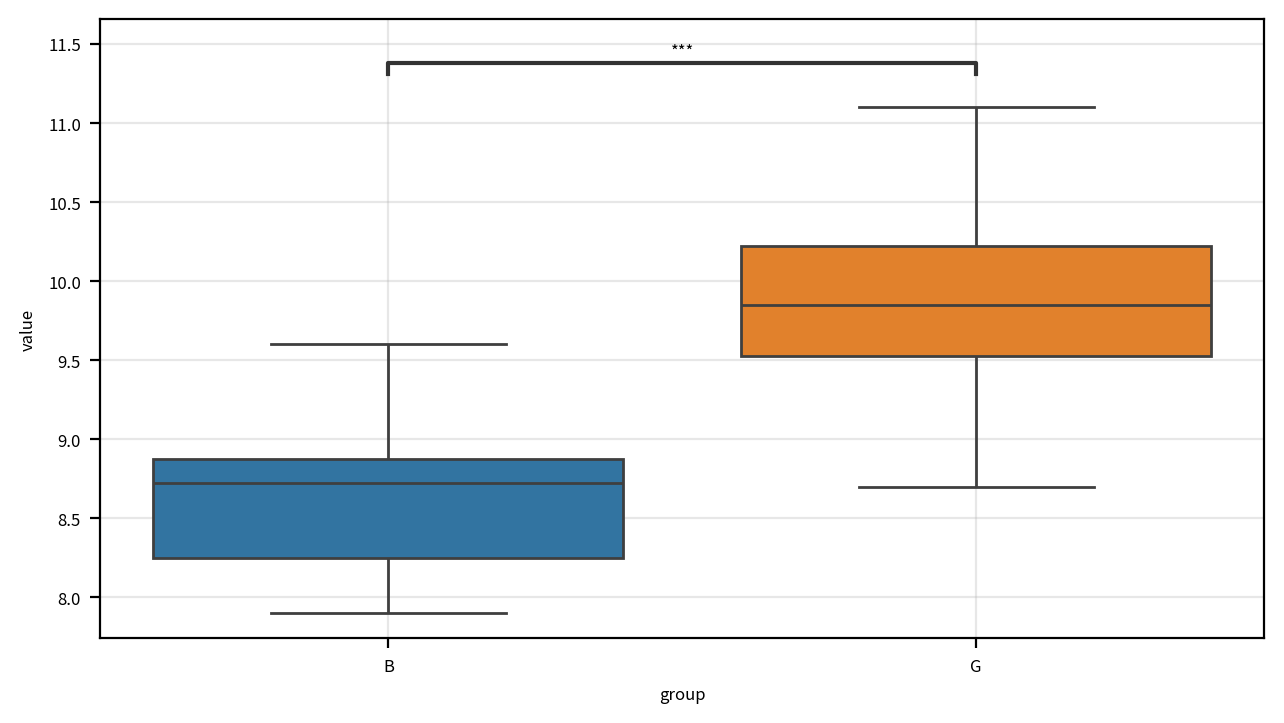

In [11]:
# 1. 그래프 초기화
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.boxplot(data=df, x='group', y='value', hue='group')
annotator=Annotator(ax, data=df, x='group', y='value', pairs=[('B','G')])
annotator.configure(test='t-test_ind')      # t-test_ind, t-test_paired, t-test_welch, Levene 등
annotator.apply_and_annotate()

# 3. 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

In [12]:
origin=load_data('heatrate')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab10_/heatrate.xlsx
[desc] 두 독립적인 그룹의 심장병 환자에 대한 심장계수(cardiac index)를 측정한 데이터. `그룹1`은 심장수술을 받고 부착한 인공장기의 기능이 정상적인 사람들이고, `그룹2`는 비정상으로 판명된 사람들이다.심장계수는 수술 직후에 측정하였다. (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (8, 2)
행 개수 : 8개
열 개수 : 2개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   그룹1     8 non-null      float64
 1   그룹2     8 non-null      float64
dtypes: float64(2)
memory usage: 260.0 bytes
None


,그룹1,그룹2
0,3.84,3.97
1,2.60,2.50
2,1.19,2.70
3,2.00,3.36
4,6.20,3.55


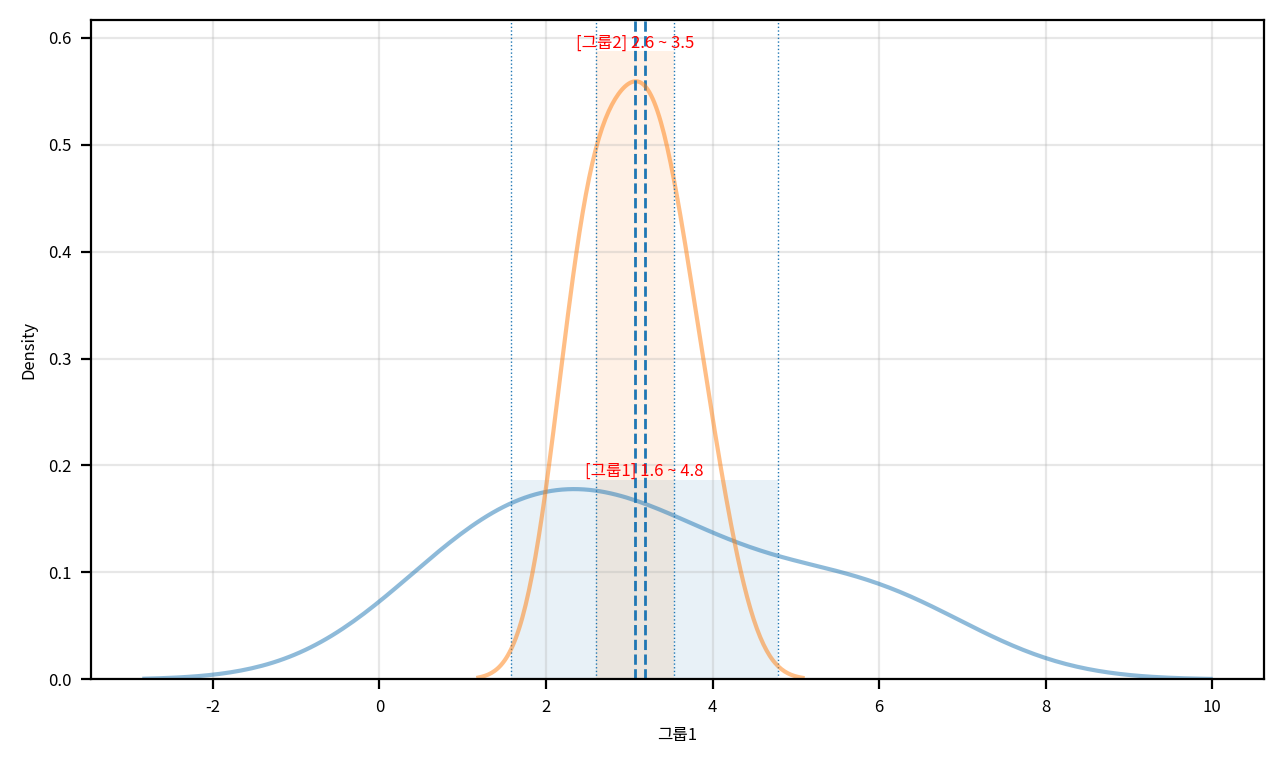

In [13]:
# 확인할 데이터
data=origin[['그룹1','그룹2']]

width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max=data[c].max()
    clevel=0.95
    dof=len(data[c])-1
    sp_mean=data[c].mean()
    sp_std=data[c].std(ddof=1)
    sp_std_error=sp_std/sqrt(len(data[c]))
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax=ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s='[%s] %0.1f ~ %0.1f'%(c, cmin, cmax),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontdict={'size':6, 'color':'red'})

ax.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

In [14]:
data=origin[['그룹1','그룹2']]

equal_var_fields=[]
normal_dist=True
report=[]

for c in data.columns:
    s, p=normaltest(data[c])

    normalize=(p>0.05)
    report.append({
        'field':c,
        'statistic':s,
        'p-value':p,
        'result':normalize
    })
    normal_dist=normal_dist and normalize

if len(data.columns)>1:
    if normal_dist:
        n='Bartlett'
        s, p=bartlett(*data.values.T)
    else:
        n='Levene'
        s, p=levene(*data.values.T, center='median')

    report.append({
        'field':n,
        'statistic':s,
        'p-value':p,
        'result':p>0.05
    })

report_df=DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
그룹1,0.839625,0.657170,True
그룹2,0.260764,0.877760,True
Bartlett,8.029088,0.004603,False


In [15]:
s, p=ttest_ind(origin['그룹1'], origin['그룹2'], alternative='two-sided', equal_var=False)
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s,p,'대립' if p<=0.05 else '귀무')

'statistic: 0.163, p-value: 0.874, 귀무가설 채택'

In [16]:
s, p=ttest_ind(origin['그룹1'], origin['그룹2'], alternative='less', equal_var=False)
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s,p,'대립' if p<=0.05 else '귀무')

'statistic: 0.163, p-value: 0.563, 귀무가설 채택'

In [17]:
s, p=ttest_ind(origin['그룹1'], origin['그룹2'], alternative='greater', equal_var=False)
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s,p,'대립' if p<=0.05 else '귀무')

'statistic: 0.163, p-value: 0.437, 귀무가설 채택'

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

그룹1 vs. 그룹2: Welch's t-test independent samples, P_val:8.742e-01 t=1.633e-01


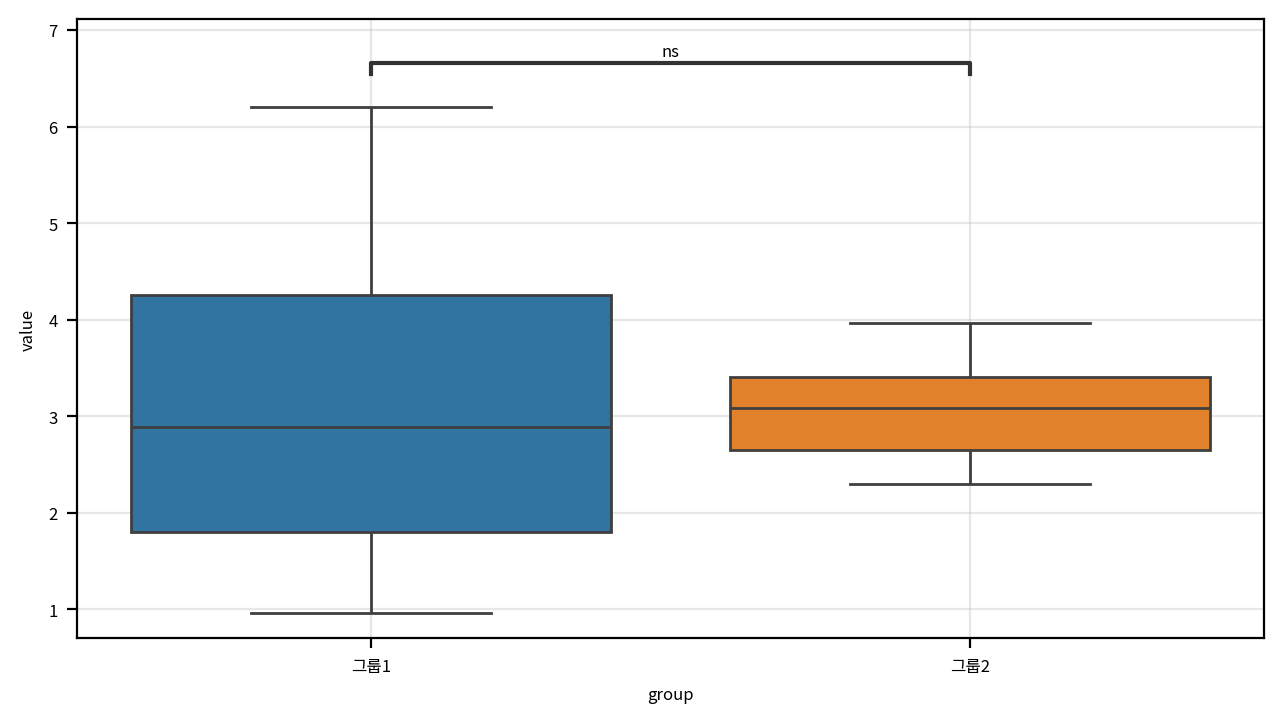

In [18]:
df=melt(origin, var_name='group', value_name='value')

# 1. 그래프 초기화
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.boxplot(data=df, x='group', y='value', hue='group')
annotator=Annotator(ax, data=df, x='group', y='value', pairs=[('그룹1', '그룹2')])      # 컬럼명 명시
annotator.configure(test='t-test_welch')      # t-test_ind, t-test_paired, t-test_welch, Levene 등
annotator.apply_and_annotate()

# 3. 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()